# Técnicas de Clustering

In [1]:
# Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure
%matplotlib inline

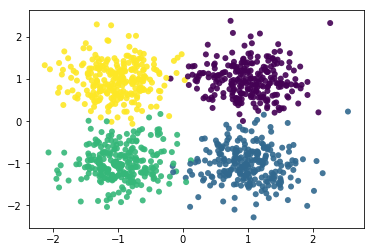

In [2]:
# Vamos gerar alguns dados aleatórios e plotar
from sklearn.datasets.samples_generator import make_blobs
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.4, random_state = 100)
plt.scatter(X[:,0], X[:,1], c = y, edgecolors = 'none', alpha = 0.9)
plt.show()

In [3]:
# Vamos agora criar o modelo e treinar com os dados de entrada, sendo que esperamos 4 clusters
km = KMeans(n_clusters = 4, max_iter = 1, n_init = 1, init = 'random', random_state = 101)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1, n_clusters=4,
    n_init=1, n_jobs=1, precompute_distances='auto', random_state=101,
    tol=0.0001, verbose=0)

In [4]:
def plot_clusters(km, xx, yy, xy):
    plt.imshow(xy, interpolation = 'nearest', cmap=plt.cm.Accent, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               aspect = 'auto', origin = 'lower')
    plt.scatter(X[:,0], X[:,1], c = km.labels_, edgecolors = 'none', alpha = 0.7)
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)

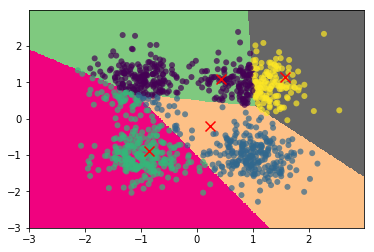

In [5]:
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
xy_pred = km.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plot_clusters(km, xx, yy, xy_pred)

Veja que rodando com uma iteração o K-Means não obteve bom resultado. 

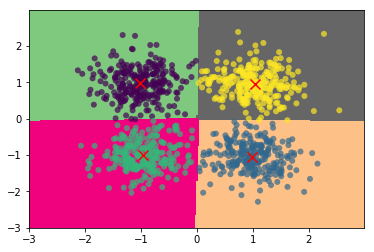

In [6]:
# Vamos amentar para 10 e ver o que ocorre
km = KMeans(n_clusters = 4, max_iter = 5, n_init = 1, init = 'random', random_state = 101)
km.fit(X)
xy_pred = km.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plot_clusters(km, xx, yy, xy_pred)

Veja que melhorou bastante

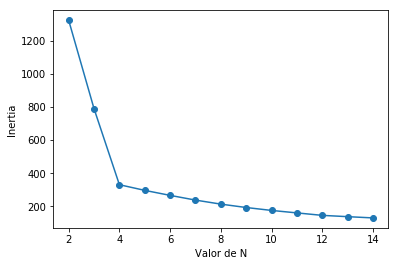

In [7]:
# Vamos agora rodar com vários outros valores e plotar o valor da Inertia
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.
n_clusters = range(2, 15)
inertias = []
for N in n_clusters:
    km = KMeans(n_clusters = N, random_state = 101)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_clusters, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Ou seja, a partir de 4 custers, a inértia reduz consideravelmente

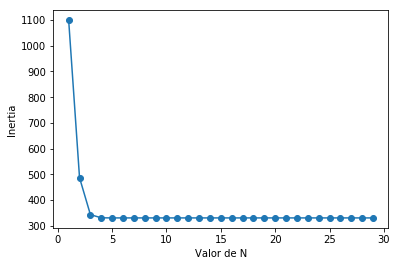

In [8]:
# Vamos verificar a influência do número de iterações na Inertia
n_iters = range(1, 30)
inertias = []
for N in n_iters:
    km = KMeans(n_clusters = 4, max_iter = N, n_init = 1, init = 'random', random_state = 101)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_iters, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Veja que o número de iterações não influencia muito. O número 5 é suficiente.

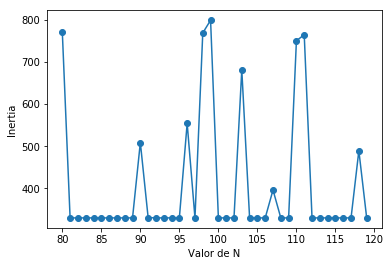

In [9]:
# Vamos verificar a influência do random state na Inertia
n_random_state = range(80, 120)
inertias = []
for N in n_random_state:
    km = KMeans(n_clusters = 4, max_iter = 5, n_init = 1, init = 'random', random_state = N)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_random_state, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Veja que o resultado pode variar muito de acordo com o valor escolhido

## Usando o dataset Iris

In [10]:
# Vamos carregar o dataset IRIS
from sklearn.datasets import load_iris

In [11]:
# Vamos agora utilizar o mecanismo PCA para reduzir a dimensionalidade das 4 variáveis do IRIS para apenas 2 e poder plotar
from sklearn.decomposition import PCA
iris = load_iris()
pca = PCA(n_components = 2).fit(iris.data)
pca_2d = pca.transform(iris.data)
pca_2d

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

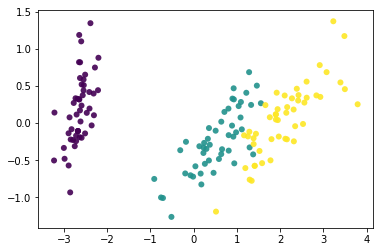

In [12]:
# Vamos plotar os dados de IRIS em 2 dimensões
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = iris.target, edgecolors = 'none', alpha = 0.9)
plt.show()

In [13]:
# Criando o modelo
km = KMeans(n_clusters = 3, random_state = 111)
km.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

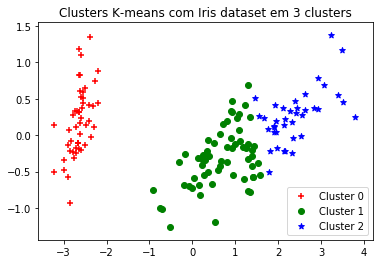

In [14]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif km.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif km.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        plt.legend([c1, c2, c3],['Cluster 0', 'Cluster 1', 'Cluster 2'])
        plt.title('Clusters K-means com Iris dataset em 3 clusters')
plt.show()

## Exercício 8

Busque um dataset CSV para realizar custerização na Internet (ex: https://www.kaggle.com/datasets)

Rode o K-Means e faça testes de cluserização com esses dados, plotando o resultado da Inertia e da Clusterização

Salve esse Jupyter com o nome 06_Clustering_Fulano
